In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"c:\Users\asus\OneDrive\Desktop\heart_disease_proj\heart.csv")


# Data Cleaning

In [36]:
print(df.head())
print(df.info())
print(df.describe())

   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope  Ca        Thal  Target  
0      3   0       fixed       0  
1      2   3      normal       1  
2      2   2  reversable       1  
3      3   0      normal       0  
4      1   0      normal       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3  

I checked if there are any Nan values and where are they located. Then, I filled the cells containing the Nan values with the mode value(The most frequent value) 

In [37]:
number_of_Nan = df.isna().sum()
print(number_of_Nan)
mode_Thal = df["Thal"].mode()[0]
df["Thal"]= df["Thal"].fillna(mode_Thal)

# for i in df["Thal"]:
#     print(i)

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64


I checked for any duplicated rows and I found none

In [38]:
number_of_dups = df.duplicated().sum()
print(number_of_dups)

0


 I started ensuring that all columns have the correct data type

In [39]:

df["Sex"] = df["Sex"].replace(
    {1:"male" , 0:"female"}
)

# df["Fbs"]= df["Fbs"].replace(

#     {0:"False" , 1:"True"}
# )

# df["RestECG"]= df["RestECG"].replace(

#     {0:"Normal" , 1:"ST-T wave abnormality" , 2:"Left ventricular hypertrophy"}
# )

# df["ExAng"] = df["ExAng"].replace(
#     {0:"No" , 1:"Yes"}
# )

# df["Target"] = df["Target"].replace(
#     {0:"False" , 1:"True" }
# )


I checked for the number of outliers and decided whether to keep these outliers or not. 

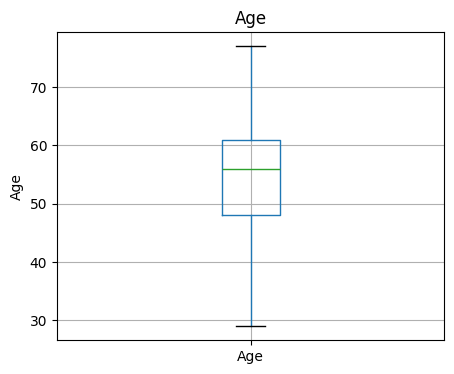

The number of outliers is 0


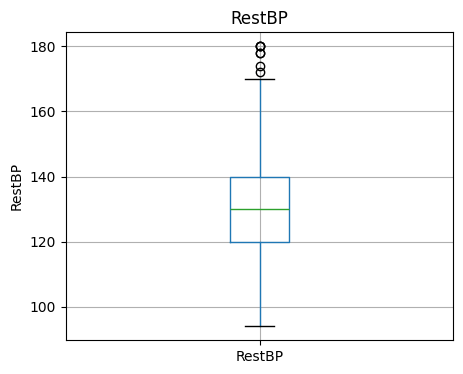

172
180
174
178
180
178
180
The number of outliers is 7


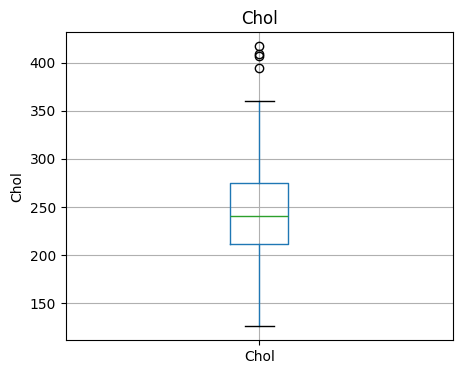

417
407
394
409
The number of outliers is 4


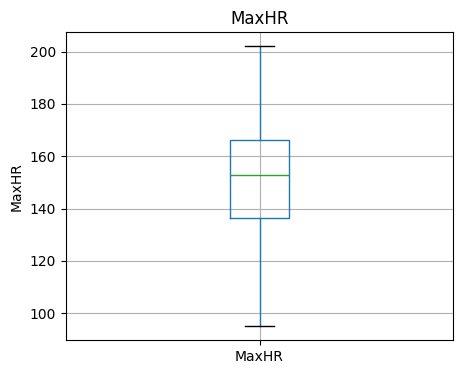

The number of outliers is 0


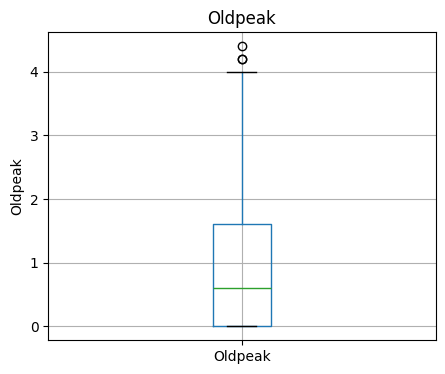

4.2
4.2
4.4
The number of outliers is 3


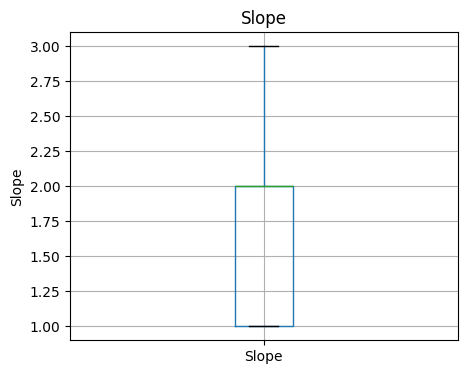

The number of outliers is 0


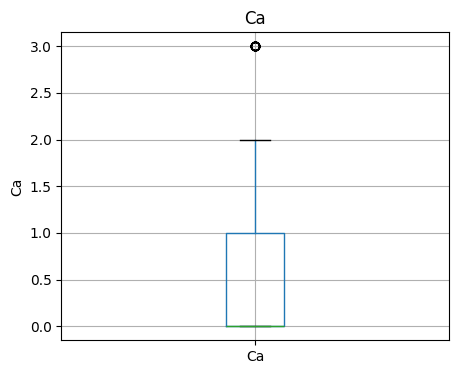

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
The number of outliers is 20


In [40]:
columns = ["Age", "RestBP" , "Chol", "MaxHR", "Oldpeak" , "Slope", "Ca"]

for col in columns:
    plt.figure(figsize = (5,4))
    df.boxplot(column = col)
    plt.title(f"{col}")
    plt.ylabel(col)
    plt.show()
    # The code below is the new method that I used to identify the outliers after doing a research.
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    counter = 0
    for value in df[col]:
        
        if value > upper_limit or value < lower_limit:
            print(value)
            counter +=1
        else: 
            pass
    print(f"The number of outliers is {counter}")

    df= df[df["RestBP"] < 190]
    df = df[df["Chol"] < 420]
    df = df[df["MaxHR"] >90]
    df = df[df["Oldpeak"] < 4.5]
    

# This code was the old code that I created manually to identify the outliers. As you can notice the new code is way more efficient.
# for i in df["RestBP"]:
#     if i > 170:
#         print(f"RestBP outlier:{i}")

# for i in df["Chol"]:
#     if i > 360:
#         print(f"Chol outlier:{i}")

# for i in df["MaxHR"]:
#     if i < 88:
#         print(f"MaxHR outlier:{i}")
        

# Univariate Analysis 

Distribution of Age

Distribution of Cholesterol

Distribution of Restbps


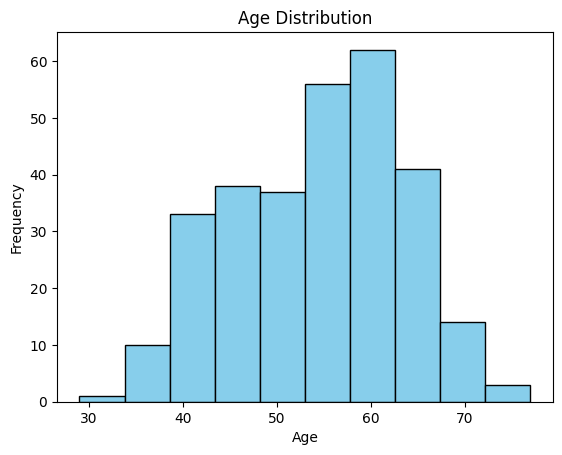

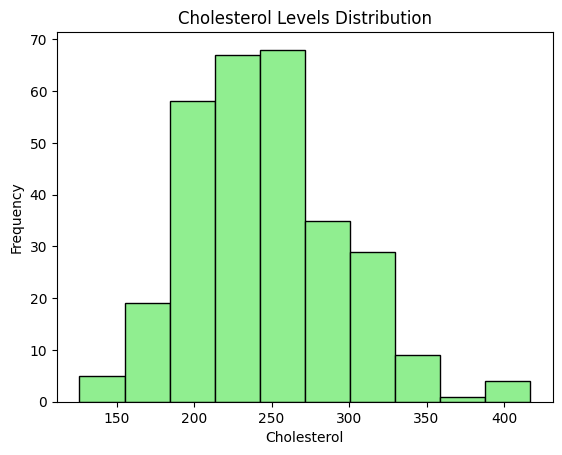

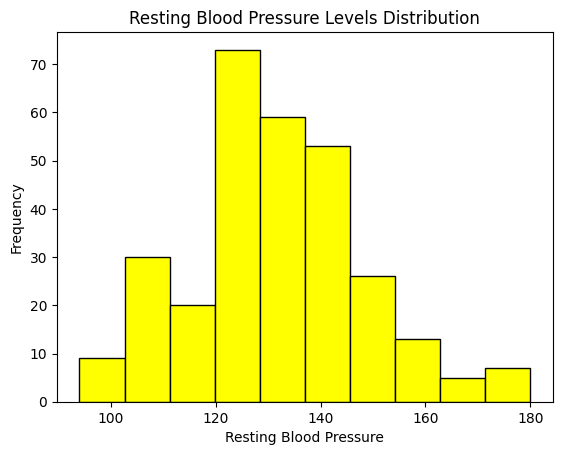

In [41]:
#I chose the number of bins that the histogram will show by using the Sturges’ Rule k=1+log2(n)
df["Age"].plot(kind = "hist",bins = 10 ,color = "skyblue", edgecolor = "black") 
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

df["Chol"].plot(kind= "hist",bins = 10,color = "lightgreen", edgecolor = "black")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.title("Cholesterol Levels Distribution")
plt.show()

df["RestBP"].plot(kind = "hist",bins = 10, color = "yellow",edgecolor = "black")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Frequency")
plt.title("Resting Blood Pressure Levels Distribution")
plt.show()


Distribution of Males vs Females

Distribution of The Target Variable

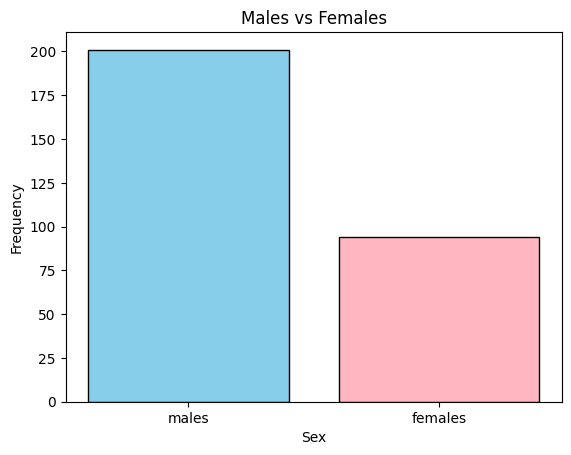

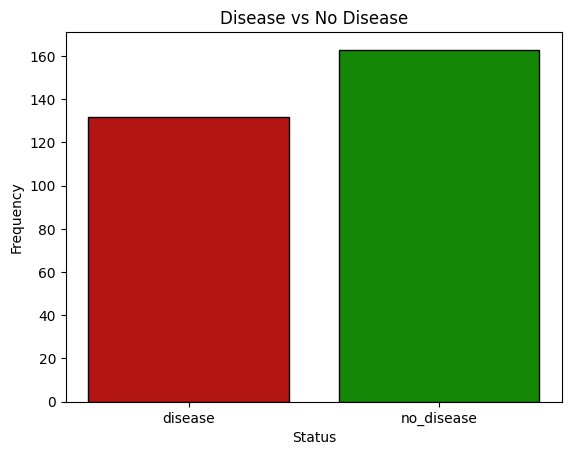

In [42]:
sex = {
    "males":0,
    "females":0
}
for value in df["Sex"]:
    if value == "male":
        sex["males"] +=1
    elif value == "female":
        sex["females"] +=1

plt.bar(sex.keys() , sex.values() , edgecolor = "black" , color = ["skyblue" , "lightpink"])
plt.title("Males vs Females")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()



target = {
    "disease":0,
    "no_disease":0
}
for value in df["Target"]:
    if value == 1:
        target["disease"] +=1
    elif value == 0:
        target["no_disease"] +=1



plt.bar(target.keys(), target.values(), color = ["#b31414" , "#148707"] , edgecolor = "black")
plt.title("Disease vs No Disease")
plt.xlabel("Status")
plt.ylabel("Frequency")
plt.show()






# Bivariate Analysis 

Relationship between Age and Cholesterol

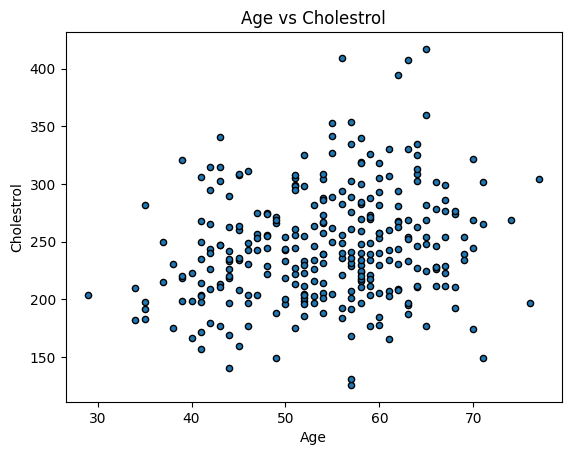

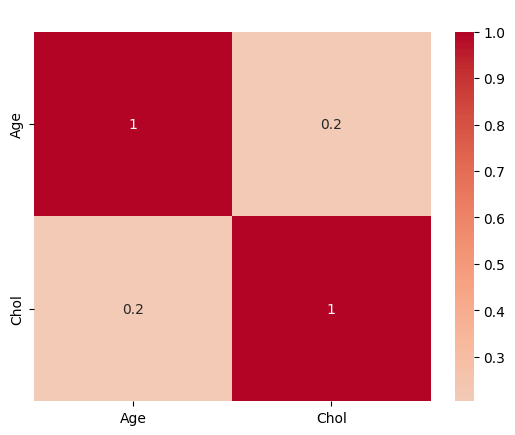

In [43]:
df.plot(kind = "scatter" , x = "Age" , y = "Chol" , edgecolor = "black")
plt.title("Age vs Cholestrol")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.show()

sns.heatmap(df[["Age","Chol"]].corr() , annot = True, cmap="coolwarm", center = 0 )
plt.title(" ")
plt.show()

Resting Blood Pressure Difference Between Males and Females

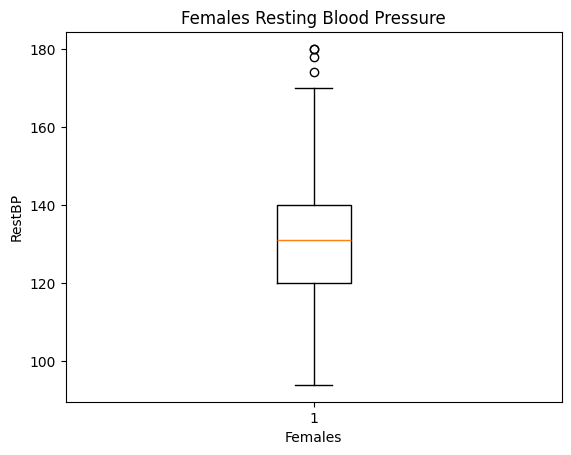

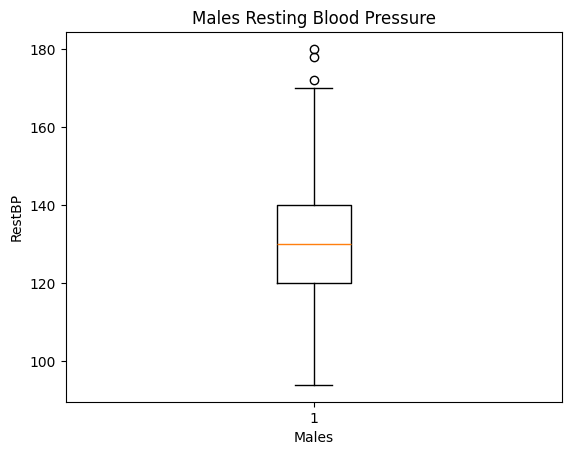

In [44]:
females_ind = df.index[df["Sex"] == "female"]
males_ind = df.index[df["Sex"] == "male"]

f_RestBP = []
m_RestBP = []
for index in females_ind:
    f_RestBP.append(df["RestBP"][index])
for index in males_ind:
    m_RestBP.append(df["RestBP"][index])

plt.boxplot(f_RestBP)
plt.title("Females Resting Blood Pressure")
plt.xlabel("Females")
plt.ylabel("RestBP")
plt.show()

plt.boxplot(m_RestBP)
plt.title("Males Resting Blood Pressure")
plt.xlabel("Males")
plt.ylabel("RestBP")
plt.show()

# Correlation Table

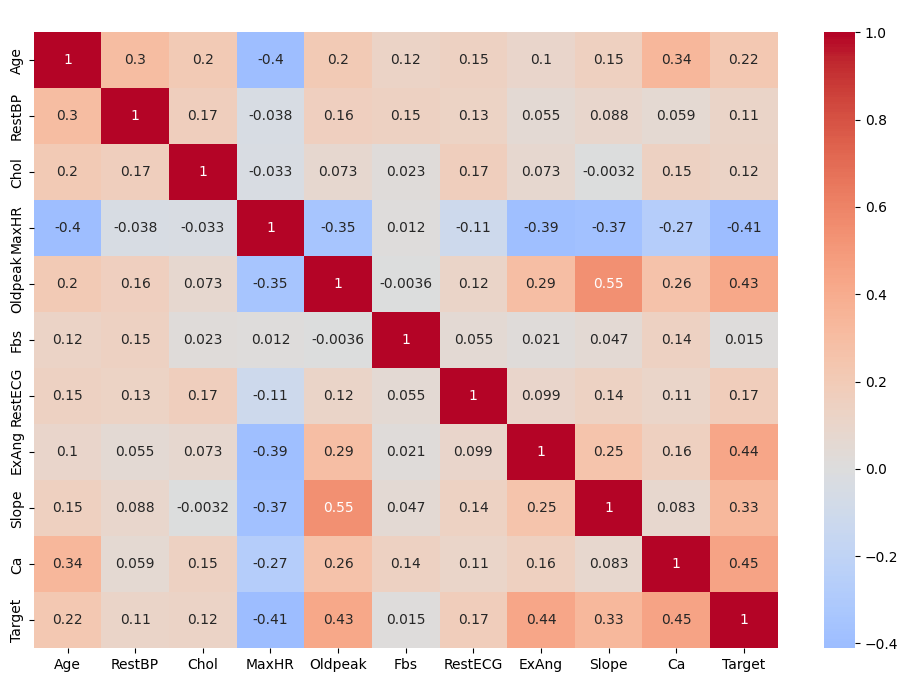

In [45]:
plt.figure(figsize = (12,8))
sns.heatmap(df[["Age", "RestBP","Chol","MaxHR","Oldpeak","Fbs","RestECG","ExAng","Slope","Ca","Target"]].corr() , annot = True, cmap="coolwarm", center = 0 )
plt.title(" ")
plt.show()

1. The increase of the old peak value highly corresponds to higher heart disease likelihood.
2. Older age isn't a strong or a very direct indicator of a higher cholestrol level.
3. Older age corresponds to a decrease in the maximum heart rate.
4. Patients with higher maximum heart rates tend to have lower chances of heart disease.

The most important features for predicting heart disease:
1. Exercise-Induced Angina(ExAng). 
2. The old peak value.
3. The slop value. 